## Group Request Evaluation

       now  bufferOld  bufferNew
0   407898          0    2000000
1   946366    1461532    3461532
2  1868186    2539712    4539712
3  4206632    2201266    4201266
4  5898804    2509094    4509094


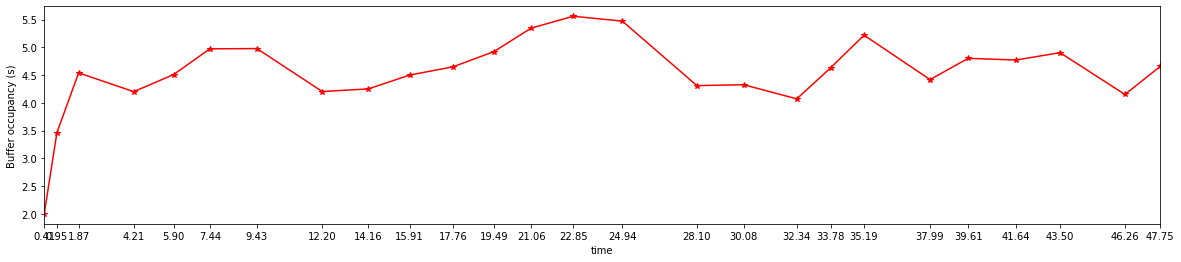

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math

def read_bufferlog(csv_path, simId, clientId) :
    filename = csv_path + "buffer_sim" + str(simId) +"_cl" + str(clientId) + ".csv"
    return pd.read_csv(filename, sep="\t")

# ==================================================
csv_path = '../ns-3-allinone/ns-3.35/contrib/etri_mvdash/'
simId = 0
clientId = 0


def show_multiview_play(df_play) :
    nSegments = df_play.shape[0]
    print(df_play.head())

    # x=np.arange(0,nSegments,1)
    time=df_play["now"]*1/1000000
    buffer_new = df_play["bufferNew"]*1/1000000

    plt.figure(figsize=(20, 4))
    plt.plot(time, buffer_new, 'r*-',label='Download priority')
    plt.xticks(time)
    plt.margins(x=0)
    plt.ylabel("Buffer occupancy (s)")
    plt.xlabel("time")
    plt.show()
    return


df_buffer = read_bufferlog(csv_path, simId, clientId)
show_multiview_play(df_buffer)


# Without adaptation -> set rate = 2

       now  bufferOld  bufferNew
0   407898          0    2000000
1  1275678    1132220    3132220
2  2595635    1812263    3812263
3  4064394    2343504    4343504
4  5115961    3291937    5291937


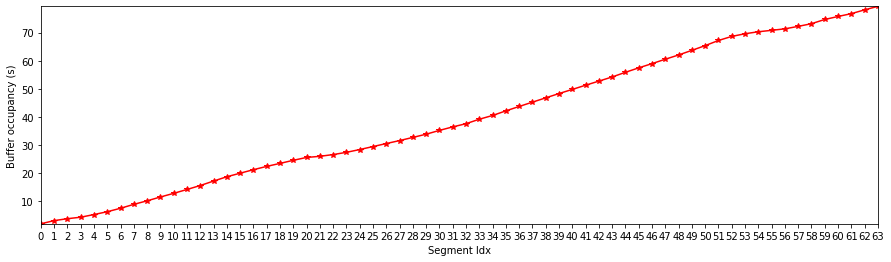

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

def read_bufferlog(csv_path, simId, clientId) :
    filename = csv_path + "buffer_sim" + str(simId) +"_cl" + str(clientId) + ".csv"
    return pd.read_csv(filename, sep="\t")

# ==================================================
csv_path = '../ns-3-allinone/ns-3.35/contrib/etri_mvdash/'
simId = 0
clientId = 0


def show_multiview_play(df_play) :
    nSegments = df_play.shape[0]
    print(df_play.head())

    # x=np.arange(0,nSegments,1)
    time=df_play["now"]*1/1000000
    buffer_new = df_play["bufferNew"]*1/1000000

    plt.figure(figsize=(15, 4))
    plt.plot(x, buffer_new, 'r*-',label='Download priority')
    plt.xticks(x)
    plt.margins(x=0, y=0)
    # plt.tight_layout(pad=0.05)
    plt.ylabel("Buffer occupancy (s)")
    plt.xlabel("Segment Idx")
    plt.show()
    return


df_buffer = read_bufferlog(csv_path, simId, clientId)
show_multiview_play(df_buffer)


# Buffer Group

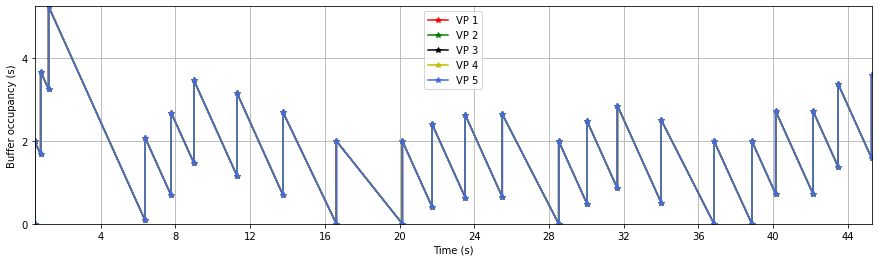

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

def read_bufferlog(csv_path, simId, clientId) :
    filename = csv_path + "buffer_sim" + str(simId) +"_cl" + str(clientId) + ".csv"
    return pd.read_csv(filename, sep="\t")

# ==================================================
csv_path = '../ns-3-allinone/ns-3.35/contrib/etri_mvdash/'
simId = 0
clientId = 0


def show_multiview_play(df_buffer) :
    nSegments = df_buffer.shape[0]

    # x=np.arange(0,nSegments,1)

    #==============Combine buffer old&New in single Array =======================
    time= df_buffer["now_1"]*1/1000000
    buffer_new_1 = df_buffer["bufferNew_1"]*1/1000000
    buffer_new_2 = df_buffer["bufferNew_2"]*1/1000000
    buffer_new_3 = df_buffer["bufferNew_3"]*1/1000000
    buffer_new_4 = df_buffer["bufferNew_4"]*1/1000000
    buffer_new_5 = df_buffer["bufferNew_5"]*1/1000000

    buffer_old_1 = df_buffer["bufferOld_1"]*1/1000000
    buffer_old_2 = df_buffer["bufferOld_2"]*1/1000000
    buffer_old_3 = df_buffer["bufferOld_3"]*1/1000000
    buffer_old_4 = df_buffer["bufferOld_4"]*1/1000000
    buffer_old_5 = df_buffer["bufferOld_5"]*1/1000000

    buffer_1=[]
    buffer_2=[]
    buffer_3=[]
    buffer_4=[]
    buffer_5=[]
    x=[]
    for i in range(0,nSegments):
        x.append(time[i])
        buffer_1.append(buffer_old_1[i])
        buffer_2.append(buffer_old_2[i])
        buffer_3.append(buffer_old_3[i])
        buffer_4.append(buffer_old_4[i])
        buffer_5.append(buffer_old_5[i])
        x.append(time[i])
        buffer_1.append(buffer_new_1[i])
        buffer_2.append(buffer_new_2[i])
        buffer_3.append(buffer_new_3[i])
        buffer_4.append(buffer_new_4[i])
        buffer_5.append(buffer_new_5[i])
    
    plt.figure(figsize=(15, 4))
    #==Combine buffer old&New in single Array ==
    plt.plot(x, buffer_1, 'r*-',label='VP 1')
    plt.plot(x, buffer_2, 'g*-',label='VP 2')
    plt.plot(x, buffer_3, 'k*-',label='VP 3')
    plt.plot(x, buffer_4, 'y*-',label='VP 4')
    plt.plot(x, buffer_5, '*-', color="royalblue", label='VP 5')

    #==Buffer New only ==
    # plt.plot(time, buffer_new_1, 'r*-',label='VP 1')
    # plt.plot(time, buffer_new_2, 'g*-',label='VP 2')
    # plt.plot(time, buffer_new_3, 'b*-',label='VP 3')
    # plt.plot(time, buffer_new_4, 'y*-',label='VP 4')
    # plt.plot(time, buffer_new_5, 'k*-',label='VP 5')

    plt.grid()
    plt.legend()
    # plt.xticks(x,rotation=45) #use for debugging
    plt.xticks(np.arange(min(np.around(x)), max(np.around(x))+1, 4))
    plt.yticks(np.arange(min(np.around(time)), max(np.around(time))+1, 2))

    plt.margins(x=0, y=0)
    plt.ylabel("Buffer occupancy (s)")
    plt.xlabel("Time (s)")
    plt.show()
    
    return


df_buffer = read_bufferlog(csv_path, simId, clientId)
show_multiview_play(df_buffer)